# Diamond Dataset Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
diamonds = pd.read_csv('diamonds.csv')
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [3]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## 1. Univariate Exploration
Bắt đầu bằng main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

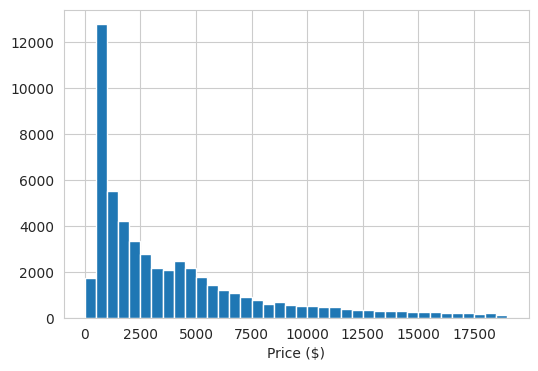

In [13]:
# univariate plot of diamond prices
binsize = 500
bins = np.arange(0, diamonds['price'].max()+binsize, binsize)

plt.figure(figsize=[6, 4])
plt.hist(data=diamonds, x='price', bins=bins)
plt.xlabel('Price ($)')
plt.show()

Tiếp theo plot of our first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?

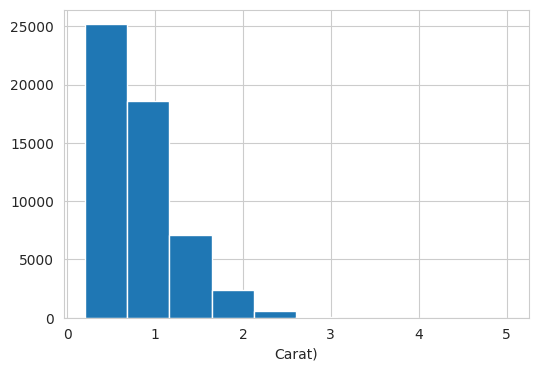

In [23]:
# univariate plot of diamond prices
plt.figure(figsize=[6, 4])
plt.hist(data=diamonds, x='carat')
plt.xlabel('Carat)')
plt.show()

Tiếp theo là other three 'C' quality measures: cut, color, and clarity. For each of these measures, does the data we have tend to be higher on the quality scale, or lower?

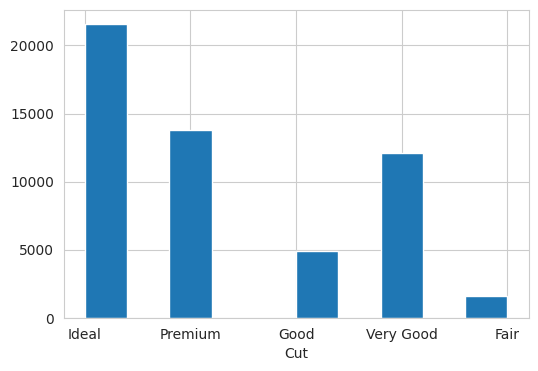

In [15]:
# univariate plots of cut
plt.figure(figsize=[6, 4])
plt.hist(data=diamonds, x='cut')
plt.xlabel('Cut')
plt.show()

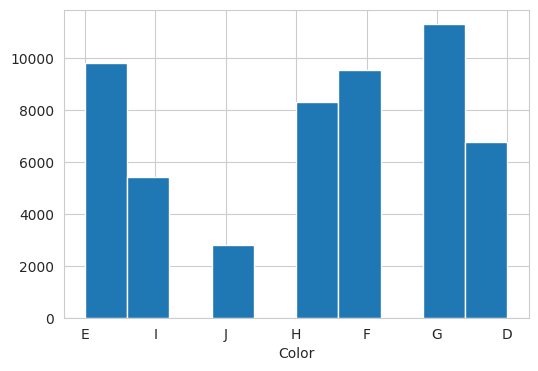

In [16]:
# univariate plots of color
plt.figure(figsize=[6, 4])
plt.hist(data=diamonds, x='color')
plt.xlabel('Color')
plt.show()

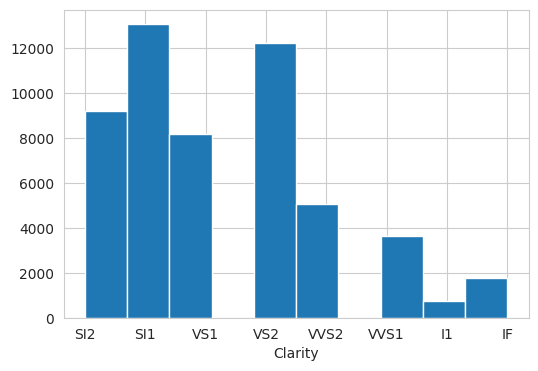

In [17]:
# univariate plots of clarity
plt.figure(figsize=[6, 4])
plt.hist(data=diamonds, x='clarity')
plt.xlabel('Clarity')
plt.show()

## 2. Bivariate Exploration

In [18]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

Giờ xem relationships between pairs of variables, particularly how each of them relate to diamond price.

Bắt đầu bằng plot of price against carat weight. What kind of shape does the relationship between these variables take?

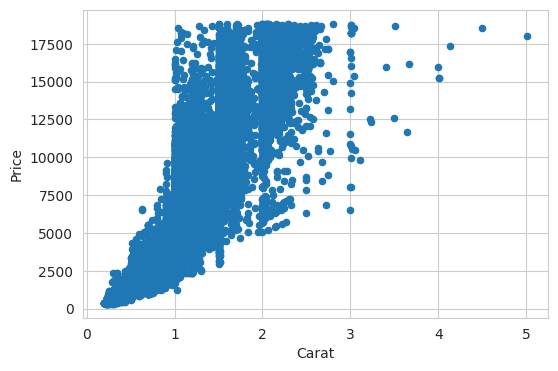

In [36]:
# bivariate plot of price vs. carat
diamonds.plot.scatter(x='carat', y='price', figsize=[6, 4])
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

Tiếp theo xem relationship giữa price và three categorical quality features, cut, color, and clarity. Are there any surprising trends to be seen here?

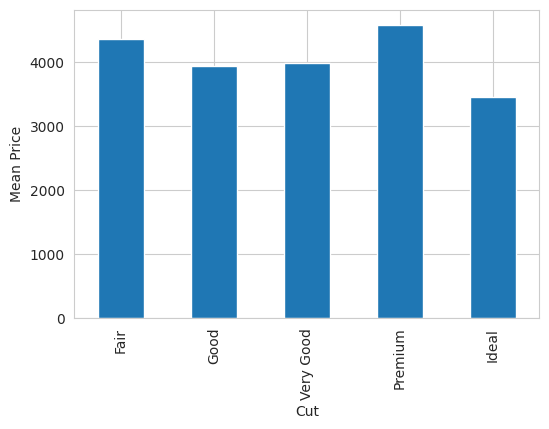

In [37]:
# bivariate plots of price vs. cut
mean_price_by_cut = diamonds.groupby('cut')['price'].mean()
mean_price_by_cut.plot.bar(x='cut', y='price', figsize=[6, 4])
plt.xlabel('Cut')
plt.ylabel('Mean Price')
plt.show()

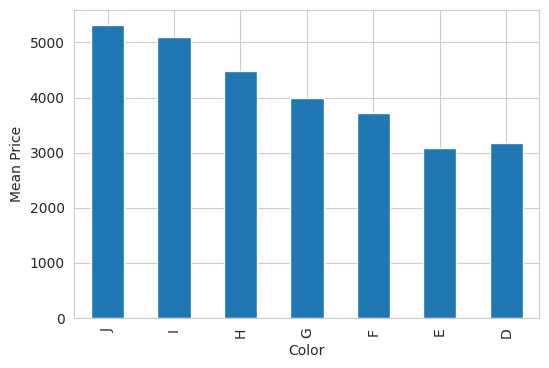

In [38]:
# bivariate plots of price vs. color
mean_price_by_color = diamonds.groupby('color')['price'].mean()
mean_price_by_color.plot.bar(x='color', y='price', figsize=[6, 4])
plt.xlabel('Color')
plt.ylabel('Mean Price')
plt.show()

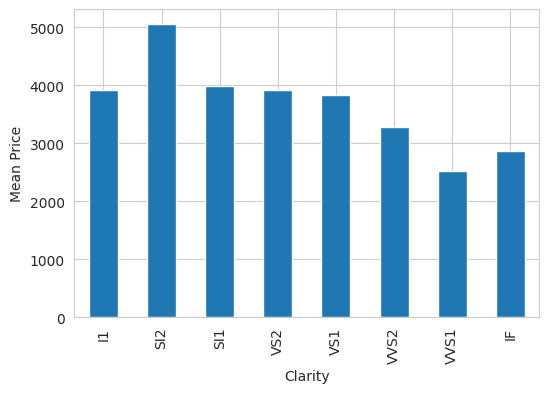

In [39]:
# bivariate plots of price vs. clarity
mean_price_by_clarity = diamonds.groupby('clarity')['price'].mean()
mean_price_by_clarity.plot.bar(x='clarity', y='price', figsize=[6, 4])
plt.xlabel('Clarity')
plt.ylabel('Mean Price')
plt.show()

Giờ xem relationships between the independent variables, nghĩa là how does carat weight change across the other three 'C' quality measures?

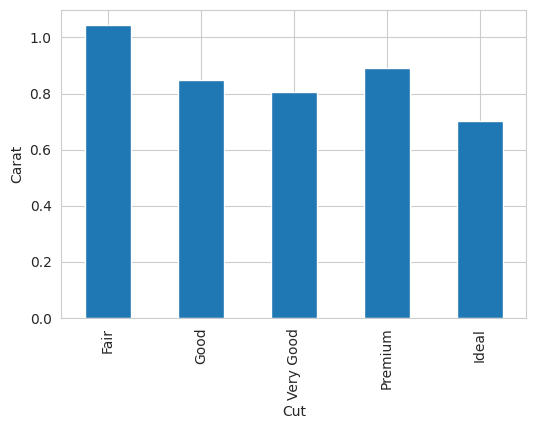

In [40]:
# bivariate plots of carat vs. cut
mean_carat_by_cut = diamonds.groupby('cut')['carat'].mean()
mean_carat_by_cut.plot.bar(x='cut', y='carat', figsize=[6, 4])
plt.xlabel('Cut')
plt.ylabel('Carat')
plt.show()

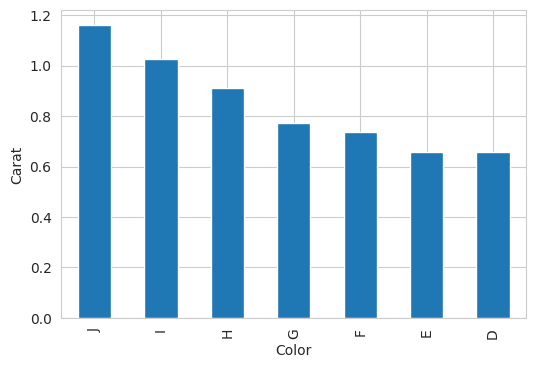

In [41]:
# bivariate plots of carat vs. color
mean_carat_by_color = diamonds.groupby('color')['carat'].mean()
mean_carat_by_color.plot.bar(x='color', y='carat', figsize=[6, 4])
plt.xlabel('Color')
plt.ylabel('Carat')
plt.show()

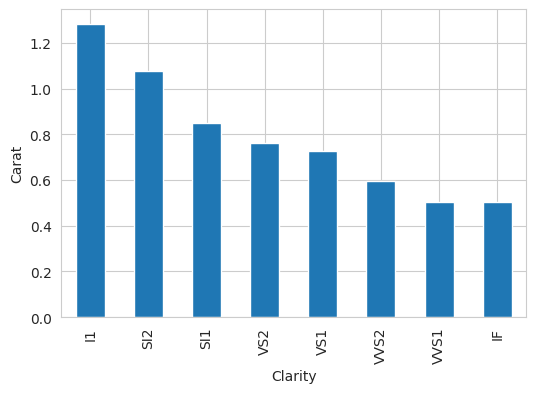

In [42]:
# bivariate plots of carat vs. clarity
mean_carat_by_clarity = diamonds.groupby('clarity')['carat'].mean()
mean_carat_by_clarity.plot.bar(x='clarity', y='carat', figsize=[6, 4])
plt.xlabel('Clarity')
plt.ylabel('Carat')
plt.show()

## 3. Multivariate Exploration
Ta đã thấy log of price was approximately linearly related to cube root of carat weight, as analogy to its length, width, and depth. Ta cũng thấy có một unintuitive relationship between price and categorical quality measures of cut, color, and clarity, that median price decreased with increasing quality. Investigating distributions more clearly and looking at relationship between carat weight with three categorical variables showed that this was due to carat size tending to be smaller for the diamonds with higher categorical grades.

Bắt đầu bằng plot of relationship between price, carat, and clarity. Ta đã thấy clarity had the clearest interactions with price and carat. How clearly does this show up in a multivariate visualization?

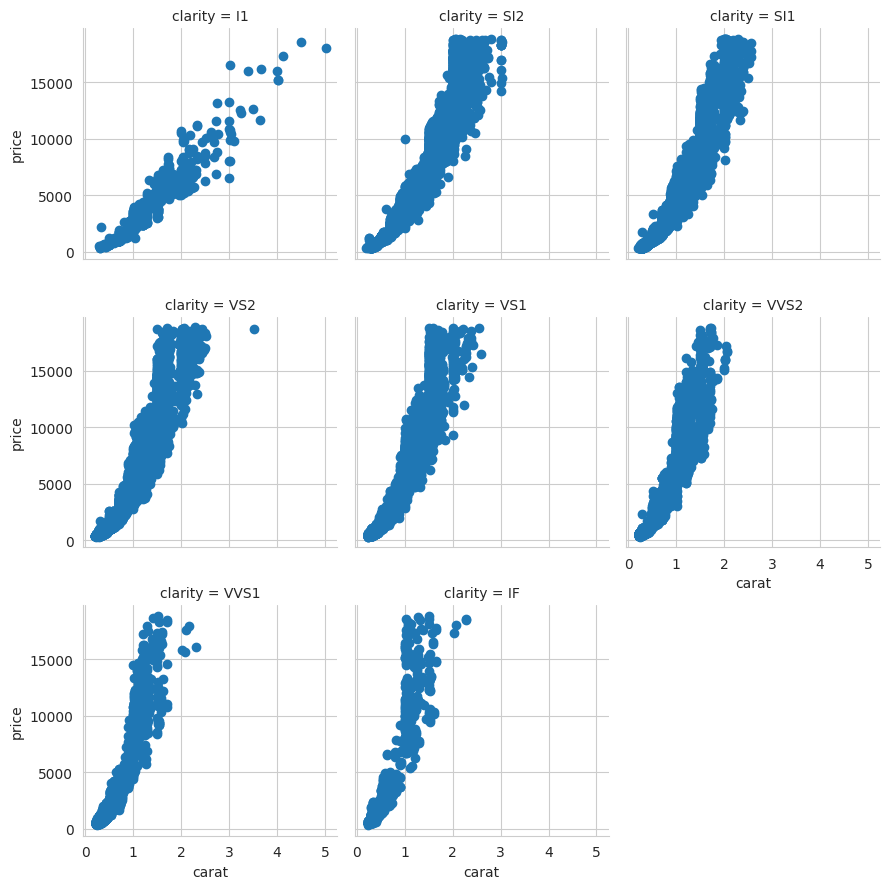

In [43]:
# multivariate plot of price by carat weight, and clarity
g = sb.FacetGrid(data = diamonds, col = 'clarity',col_wrap=3,
                margin_titles = True)
g.map(plt.scatter, 'carat', 'price')

Giờ plot for diamond price against cut and color quality features. To avoid trap of higher quality grades being associated with smaller diamonds, and thus lower prices, we should focus our visualization on only a small range of diamond weights. For this plot, select diamonds in a small range around 1 carat weight. Try to make it so that your plot shows effect of each of these categorical variables on price of diamonds.

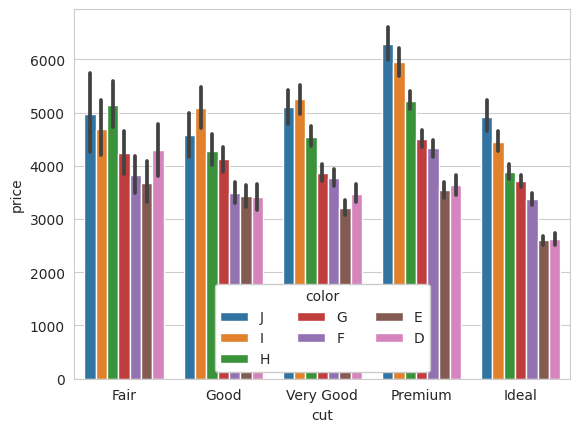

In [44]:
# multivariate plot of price by cut and color, for approx. 1 carat diamonds
ax = sb.barplot(data = diamonds, x = 'cut', y = 'price', hue = 'color')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'color')

## 4. Explanatory Polishing
Ta đã thấy primary driver of price was carat weight, where the log of price was approximately linearly related to the cube root of carat weight, analogous to the diamond's length, width, or depth. The price was then modified by the diamond's cut, color, and clarity grades. Giờ ta polish two plots from earlier exploration so that they can be presented to others in an understandable form.

Đầu tiên là base relationship between price and carat. Make additions and revisions to the code below to refine the given plot.

In [45]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

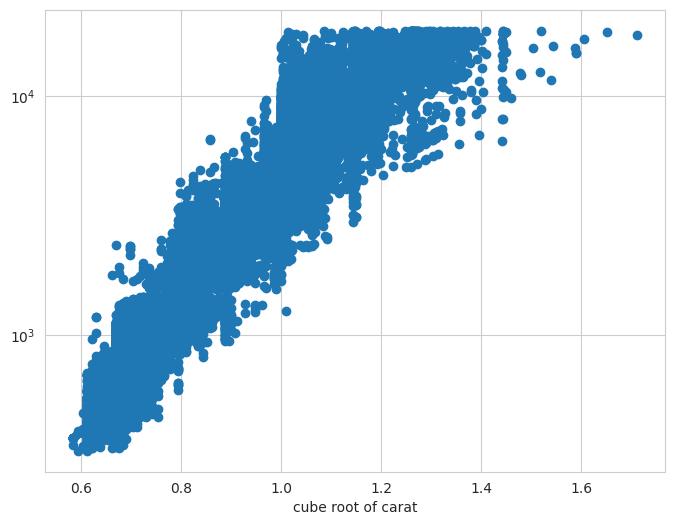

In [46]:
# scatter plot of price vs. carat, with log transform on price axis and
# cube-root transform on price
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)
plt.figure(figsize = [8, 6])
plt.scatter(data=diamonds, x='cr_carat', y='price')
plt.xlabel('cube root of carat')
plt.yscale('log')
plt.show()

Tiếp theo là multivariate plot of price against levels of color and cut, for diamonds of about 1 carat weight. Make additions and revisions to the code below to refine the given plot.

In [47]:
# select diamonds of approximately 1 carat
diamond_flag = (diamonds['carat'] >= 0.99) & (diamonds['carat'] <= 1.03)
diamonds_1c = diamonds.loc[diamond_flag,:]

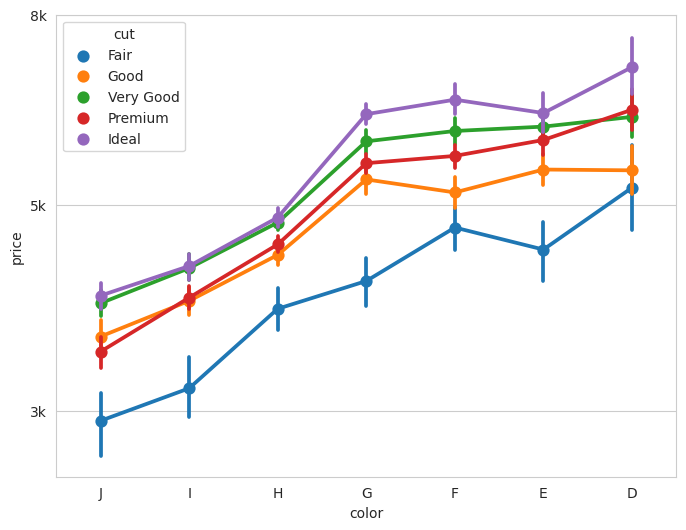

In [48]:
plt.figure(figsize = [8,6])
ax = sb.pointplot(data = diamonds_1c, x = 'color', y = 'price', hue = 'cut')
# special handling of tick marks following seaborn function - you might try
# doing a log transform on the data itself instead of this workaround.
plt.yscale('log')
plt.yticks([3000, 5000, 8000], ['3k', '5k', '8k'])
ax.set_yticklabels([], minor = True)
plt.show();